# LAB 5. CONSTRAINED OPTIMIZATION: EQUALITY AND INEQUALITY CONSTRAINTS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from QPGC import QPGenericConstraints

In [2]:
help(QPGenericConstraints)

Help on function QPGenericConstraints in module QPGC:

QPGenericConstraints(G, g, A, C, b, d)
    Convex optimization problem with equality and inequality constraints:
     
               min f(x)=1/2 x^T G X + g^T x     s.t.   A^T x = b i C^T x >= d
    
    Call it with:
    
    x = QPGenericConstrains(G, g, A, C, b, d)
    
    Notation:
    
    n = number of variables
    p = number of equality constants
    m = number of inequality constants
     
    Dimensions:   G -> n x n
                  g -> n x 1
                  A -> n x p
                  C -> n x m
                  b -> p x 1  
                  d -> m x 1



In [3]:
def generate_sample(m1, s1, m2, s2, n_samples):  # n_samples = m
    n_samples_class = n_samples // 2
    
    X_positive = np.random.multivariate_normal(m1, s1, n_samples_class)
    X_negative = np.random.multivariate_normal(m2, s2, n_samples_class)
    
    X = np.hstack([X_positive, X_negative])
    y = np.r_[np.ones(n_samples_class), -np.ones(n_samples_class)]
    
    return X, y

In [4]:
def plot_sample(X, y, w=None, b=None):
    cdict = {1: 'red', -1: 'blue'}
    print(X, y)
    
    for c in np.unique(y):
        idx = np.where(y == c)
        plt.scatter(X[0, idx], X[1, idx], c=cdict[c], label=int(c))

    # This part has to be changed later on
    if w is not None and b is not None:
        x_values = np.arange(-5, 5, 0.1)
        line = x_values * w[0] + b

        plt.plot(x_values, -line / w[1], 'k')
        plt.plot(x_values, (-line + 1) / w[1], 'k--')
        plt.plot(x_values, (-line - 1) / w[1], 'k--')

    plt.legend()
    plt.show()

In [5]:
def create_dual_formulation(X, y, n_samples):
    Y = np.diagflat(y)
    identity_mat = np.eye(n_samples)
    ones = np.ones(n_samples)
    
    G = np.dot(Y, np.dot(X.T, np.dot(X, Y)))
    g = -ones
    A = y.reshape(-1, 1)
    C = np.hstack([identity_mat, -identity_mat])
    b = np.zeros(1)
    d = np.r_[np.zeros(n_samples), -ones]
    
    return G, g, A, C, b, d

In [6]:
m1 = [0.,0.]
s1 = [[1, -0.9], [-0.9, 1]]
m2sep = [3., 6.]
s2sep = [[1, 0], [0, 1]]
m2nsep = [1., 2.]
s2nsep = s2sep

## SIMPLE CASE

In [7]:
n_samples = 4
K = 1
X, y = generate_sample(m1, s1, m2sep, s2sep, n_samples)

[[-0.52931895 -0.04223444  3.79378232  4.52725766]
 [-0.78009253  0.56495316  2.84794616  6.61792974]] [ 1.  1. -1. -1.]


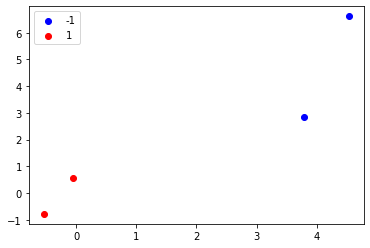

In [8]:
plot_sample(X, y)

In [9]:
G, g, A, C, b, d = create_dual_formulation(X, y, n_samples)
print(G.shape)
print(g.shape)
print(A.shape)
print(C.shape)
print(b.shape)
print(d.shape)

(4, 4)
(4,)
(4, 1)
(4, 8)
(1,)
(8,)


In [10]:
x = QPGenericConstraints(G, g, A, C, b, d)
print(x)

[9.61475614e-11 1.00365926e-01 1.00365926e-01 3.82417846e-11]
